## kNN
### O kNN (k-Nearest Neighbors) é um algoritmo de aprendizado supervisionado utilizado em problemas de classificação. Ele é especialmente adequado para problemas multiclasse, onde há mais de duas classes possíveis para a classificação de dados.

------------------------------------------------------------------------------------------------------------------------------

### **Classificação Multiclasse:**

#### Para problemas multiclasse, o kNN pode ser configurado de várias maneiras:
#### -Um contra todos (one-vs-all): Cria um classificador kNN para cada classe, onde cada classificador é treinado para distinguir uma classe das outras.
#### -Um contra um (one-vs-one): Cria um classificador kNN para cada par de classes possíveis. Durante a fase de classificação, os votos dos classificadores individuais são combinados para determinar a classe final.

---------------------------------------------------------------------------------------------------------------

### **Processo de Classificação:**

#### Quando um novo exemplo precisa ser classificado:
#### -Calcula-se a distância entre o novo exemplo e todos os exemplos de treinamento.
#### -Identificam-se os k exemplos mais próximos usando a métrica de distância escolhida.
#### -Para cada classe, conta-se quantos dos k vizinhos pertencem a essa classe.
#### -A classe do novo exemplo é determinada pela classe com o maior número de vizinhos próximos.

-----------------------------------------------------------------------------------------

### O kNN é uma abordagem direta e intuitiva para classificação multiclasse, baseada na similaridade entre os exemplos de treinamento e os novos exemplos a serem classificados. A escolha adequada de k e da métrica de distância são cruciais para seu desempenho eficaz.

### Para treinar um modelo k-Nearest Neighbors (kNN) para classificação multiclasse da coluna 'PROF_MATEMATICA_CATEG' com os parâmetros especificados, siga os passos abaixo. Vamos dividir o processo em pré-processamento dos dados e treinamento do modelo.

### **1.Carregue os Dados:** Certifique-se de que você tem acesso ao dataset 'CLASS.csv', onde os dados estão codificados conforme descrito.

### **2.Feature Selection:** Identifique as features que serão utilizadas para treinar o modelo. Pelo contexto, parece que as variáveis discretizadas ('SEXO_CATEG', 'IDADE_CATEG', etc.) e possivelmente 'PONTOS_PORTUGUES_CATEG' podem ser usadas como features preditivas.

### **3.Variável Alvo ('PROF_MATEMATICA_CATEG'):** Esta será sua variável alvo para classificação multiclasse.

### **4.Divisão em Conjunto de Treino e Teste:** Separe seus dados em conjuntos de treino e teste. Por exemplo, você pode utilizar 90% dos dados para treino e 10% para teste.

------------------------------------------------------------------------------------

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [14]:
# Carregar o dataset
gnetDf = pd.read_csv("datasets/CLASS.csv")

In [15]:
# Selecionar as colunas de interesse
features = ['SEXO_CATEG', 'IDADE_CATEG', 'FORMACAO_MAE_CATEG', 'FORMACAO_PAI_CATEG', 'ACESSO_INTERNET_CATEG',
            'NUMERO_COMPUTADORES_CATEG', 'INICIOU_ESTUDOS_CATEG', 'ENSINO_FUNDAMENTAL_CATEG', 'REPROVOU_CATEG',
            'ABANDONOU_CATEG', 'GESTAO_CATEG', 'DUVIDAS_CATEG', 'CORRIGEM_CATEG',
            'PONTOS_PORTUGUES_CATEG', 'PROF_PORTUGUES_CATEG','TURNO_ESCOLAR_CATEG']

# Retirar 'PONTOS_MATEMATICA_CATEG' por conta do viés com a coluna target
target = 'PROF_MATEMATICA_CATEG'
# Selecionar features e variável alvo no DataFrame
data = gnetDf[features + [target]]

In [16]:
# Dividir os dados em conjunto de treino e teste (por exemplo, 90% treino, 10% teste)
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

# Separar features e variável alvo no conjunto de treino
X_train = train_data[features]
y_train = train_data[target]

# Separar features e variável alvo no conjunto de teste
X_test = test_data[features]
y_test = test_data[target]

In [17]:
# Inicialize o Modelo k-NN:
k = 5  # Número de vizinhos
model = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='uniform')

In [18]:
# Treine o Modelo
model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [19]:
# Faça Previsões
y_pred = model.predict(X_test)

In [20]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir a matriz de confusão
print('Matriz de Confusão:')
print(conf_matrix)

Matriz de Confusão:
[[ 458  707   70   11    1]
 [ 616 1365  269   61    4]
 [ 150  588  256   75   11]
 [  38  222  152   62   16]
 [   4   29   45   34    6]]


In [21]:
# Imprimir o relatório de classificação
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred, target_names=['1', '2', '3', '4','5']))

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.36      0.37      0.36      1247
           2       0.47      0.59      0.52      2315
           3       0.32      0.24      0.27      1080
           4       0.26      0.13      0.17       490
           5       0.16      0.05      0.08       118

    accuracy                           0.41      5250
   macro avg       0.31      0.27      0.28      5250
weighted avg       0.39      0.41      0.39      5250



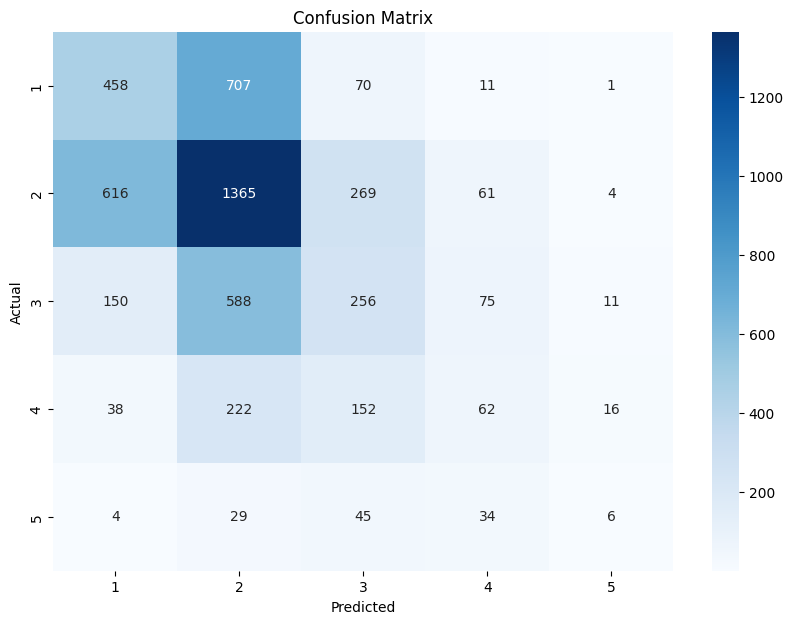

In [22]:
# Visualizar a matriz de confusão usando seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', '3','4' ,'5'], yticklabels=['1', '2', '3','4' ,'5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()